In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# https://github.com/cksajil/DSAIRP25
data = pd.read_csv('fish.csv', header = None)
data.head()

,0,1,2,3,4,5,6
0,Bream,242.0,23.2,25.4,30.0,38.4,13.4
1,Bream,290.0,24.0,26.3,31.2,40.0,13.8
2,Bream,340.0,23.9,26.5,31.1,39.8,15.1
3,Bream,363.0,26.3,29.0,33.5,38.0,13.3
4,Bream,430.0,26.5,29.0,34.0,36.6,15.1


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Type     85 non-null     object 
 1   Weight   85 non-null     float64
 2   Length1  85 non-null     float64
 3   Length2  85 non-null     float64
 4   Length3  85 non-null     float64
 5   Height   85 non-null     float64
 6   Width    85 non-null     float64
 7   Cluster  85 non-null     int32  
dtypes: float64(6), int32(1), object(1)
memory usage: 5.1+ KB


In [3]:
col_names = ['Type', 'Weight', 'Length1', 'Length2', 'Length3', 'Height', 'Width']

In [4]:
data.columns = col_names
data.head()

,Type,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,38.4,13.4
1,Bream,290.0,24.0,26.3,31.2,40.0,13.8
2,Bream,340.0,23.9,26.5,31.1,39.8,15.1
3,Bream,363.0,26.3,29.0,33.5,38.0,13.3
4,Bream,430.0,26.5,29.0,34.0,36.6,15.1


In [5]:
X = data[['Weight','Length1']]
X.head(3)

,Weight,Length1
0,242.0,23.2
1,290.0,24.0
2,340.0,23.9


In [27]:
import pickle
with open('kmeans_model.pkl', 'wb') as f:
  pickle.dump(kmeans, f)

In [26]:
with open('kmeans_model.pkl', 'rb') as f:
    kmeans_loaded = pickle.load(f)

In [14]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

In [15]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

array([[0.14666667, 0.27967807],
       [0.17575758, 0.29577465],
       [0.20606061, 0.29376258],
       [0.22      , 0.34205231],
       [0.26060606, 0.34607646],
       [0.27272727, 0.35211268],
       [0.3030303 , 0.35211268],
       [0.23636364, 0.36820926],
       [0.27272727, 0.36820926],
       [0.3030303 , 0.38631791],
       [0.28787879, 0.38430584],
       [0.3030303 , 0.39034205],
       [0.3030303 , 0.39839034],
       [0.36363636, 0.40442656],
       [0.36363636, 0.40442656],
       [0.42424242, 0.42454728],
       [0.42424242, 0.42454728],
       [0.36969697, 0.43460765],
       [0.39393939, 0.43661972],
       [0.34848485, 0.44265594],
       [0.41515152, 0.44466801],
       [0.37575758, 0.44668008],
       [0.41212121, 0.4527163 ],
       [0.42424242, 0.45472837],
       [0.43939394, 0.4527163 ],
       [0.43636364, 0.45674044],
       [0.43272727, 0.47082495],
       [0.51515152, 0.47283702],
       [0.60606061, 0.48692153],
       [0.55757576, 0.51710262],
       [0.

In [6]:
# importing k means
from sklearn.cluster import KMeans

In [8]:
wcss = []
for i in range(2,9):
  kmeans = KMeans(n_clusters = i)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)

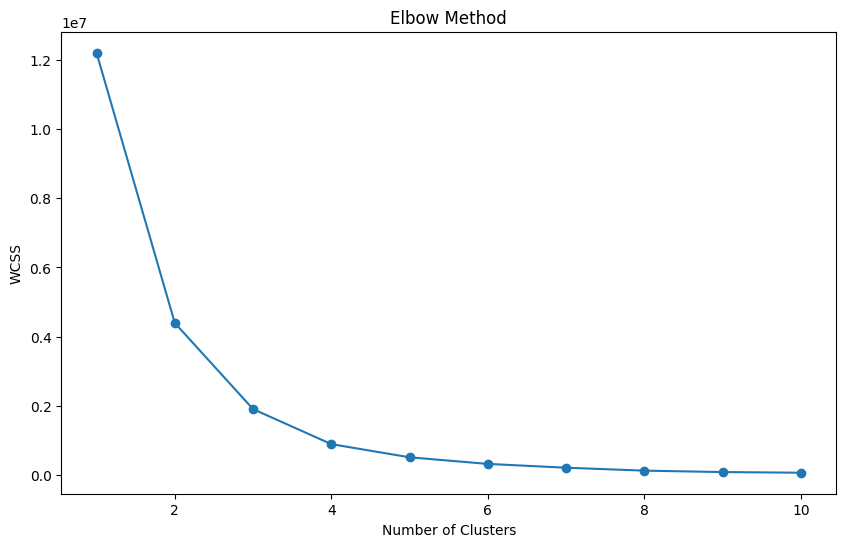

In [ ]:
# plotting the elbow method
plt.figure(figsize = (10,6))
plt.plot(range(2,9), wcss,marker = 'o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [9]:
# applying k means clustering with optimal number of clusters
kmeans = KMeans(n_clusters = 4)

kmeans.fit(X)
y_kmeans = kmeans.predict(X)

In [10]:
# Adding cluster labels to the dataset
data['Cluster'] = y_kmeans
data.head()

,Type,Weight,Length1,Length2,Length3,Height,Width,Cluster
0,Bream,242.0,23.2,25.4,30.0,38.4,13.4,1
1,Bream,290.0,24.0,26.3,31.2,40.0,13.8,1
2,Bream,340.0,23.9,26.5,31.1,39.8,15.1,0
3,Bream,363.0,26.3,29.0,33.5,38.0,13.3,0
4,Bream,430.0,26.5,29.0,34.0,36.6,15.1,0


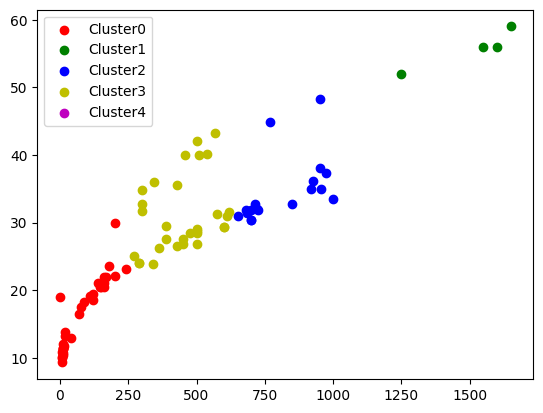

In [ ]:
# assigning custom colors to clusters
colors = ['r','g','b','y','m']

for i in range(5):
  cluster_data = X[y_kmeans ==i]
  plt.scatter(cluster_data['Weight'],
              cluster_data['Length1'],
              c=colors[i],
              label = f'Cluster{i}')
  plt.legend()

In [ ]:
# function to predict cluster for a new fish
def predict_cluster(Weight, Length):
  new_data = [[Weight,Length]]
  cluster = kmeans.predict(new_data)
  return cluster[0]

In [ ]:
# example
new_fish_Weight = 290
new_fish_Length = 24

predicted_cluster = predict_cluster(new_fish_Weight,new_fish_Length)
print(f'The fish belongs to cluster: {predicted_cluster}')

The fish belongs to cluster: 3


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


In [ ]:
from sklearn.metrics import silhouette_score
  #Silhouette score of kmeans clustering
silhouette_avg1 = silhouette_score(X, y_kmeans)
print(silhouette_avg1)

0.6120914452578201
